<img src="https://imgs.search.brave.com/nAN7oz_7Lp8wj8rE-mskHnfOvhevF5v56ZXkqOwjbKc/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9zMy5l/dS13ZXN0LTMuYW1h/em9uYXdzLmNvbS9t/b292aWpvYi5wcm9k/LzI0NjUyOTAvbGdf/Y2VzaS1qYXVuZS5w/bmc" style="height:100px;">


# <center> <strong> Project Smart Mobility and Route Optimization </center>

# <center> Modelisation Delivrable

**Group 2** :
- Jeremy LE FOULON
- Andrew KINUTHIA
- Adnan CYUSA


 Date : 17/10/24




# <center> Introduction

## Context

ADEME, the french environment and energy managment agency, launched a call to test mobility solutions for people and goods in different areas, and our CesiCDP structure is well established in the field.

Being part of the team in charge of answering ADEME's call, we focus on the managment of delivery routes, as decided by CesiCDP.

Our primary goal is to be able to calculate, on a road network, a set of routes that connect a subset of cities between each other before returning to the starting point, all while minimizing the total duration of the route. A given city must be traversed by exactly one route of that set of routes.

However, in order to make our problem more realistic and get ADEME's full attention, we decided to add additional constraints.

<!--The aim of ADEME's call is to apply advanced optimization techniques to solve a real-world logistics challenge, that is focusing on optimizing delivery routes with various constraints such as time windows, vehicle capacities, and traffic considerations. The goal of this project is to develop a robust and innovative solution that aligns with ADEME's objectives for sustainable mobility and secures new markets with attractive financing schemes. The proposed approach involves defining the problem scope, developing the VRP model, implementing the solution, and validating and refining the approach based on real-world data and feedback.

The previous paragraph is to be removed, but I kept it just in case we need information and formulations from it. IT SHOULD BE REMOVED BEFORE SENDING THE DELIVERABLE.
-->

## Issue

How to determine a set of routes, where all cities are visited exactly once such that each route goes back to the starting point (origin) and the date when the last truck returns to the origin is mininmized?

## Constraints

- Truck capacity
- Cost of path
- Collection points
- All available trucks must be used

## Assumptions

- $k$ trucks are simultaneously available
- The time at which the last truck returns to base is to be minimized

<!--## Hypotheses

- Subset of constraints
- incremententing reduce old problem to new problem
- TSP (weighted and complete graph)
- Total cost of cycle / path i.e Payoff / cost matrix
- VRP problem
- TSP $\in$ NP-Hard
- TSP can be reduced to an instance of B, this instance of B is at least as hard as TSP.-->


## VRP

**What is VRP?**

Vehicle Routing Problem (VRP) is a classical combinational optimization problem that involves determining the most optimal/ minimum-cost set of routes for a fleet of vehicles with known vehicle capacities from a central depot to serve a given set of geographically dispersed customers who are served once, with the objective of minimizing total cost/ distance/ distribution cost travelled with satisfying some constraints (Azzahra Zayyan Firdaus ,2023).

VRP is a *NP-HARD* problem (Said Elatar et al., 2023) and has many variants corresponding to different real-world problems.

We believe our problem has its roots in Travelling Salesman problem (TSP) because VRP is an extension of TSP. This is why we believe so:


1.   **Multiple Vehicles:** TSP is typically about finding the shortest route for a single "salesman" to visit a series of locations and return to the starting point. VRP extends this by incorporating multiple vehicles that need to cover different parts of a network, each starting and ending at a central depot.
2.   **Capacity Constraints:** In TSP, there’s no limit on the amount of goods the salesman can carry. VRP, on the other hand, often includes capacity constraints on the vehicles. Each vehicle can carry only a certain amount of goods, and this limit impacts route planning, as the solution must balance the load across the fleet.
3. **Minimizing Total Cost:** While TSP generally focuses on minimizing travel distance or time for a single route, VRP optimizes the combined cost across multiple vehicles. Costs can include distance, fuel consumption, labor, and other factors associated with a fleet rather than a single route.
4. **Route Balancing:** VRP often considers balancing workloads among the vehicles, unlike TSP, where only a single route is optimized. This requirement ensures that no single vehicle is overburdened or underutilized.

Thus, with our case being a more real-life problem, VRP is more applicable to logistics, distribution, and supply chain scenarios, where real-world constraints make the simpler TSP model insufficient.






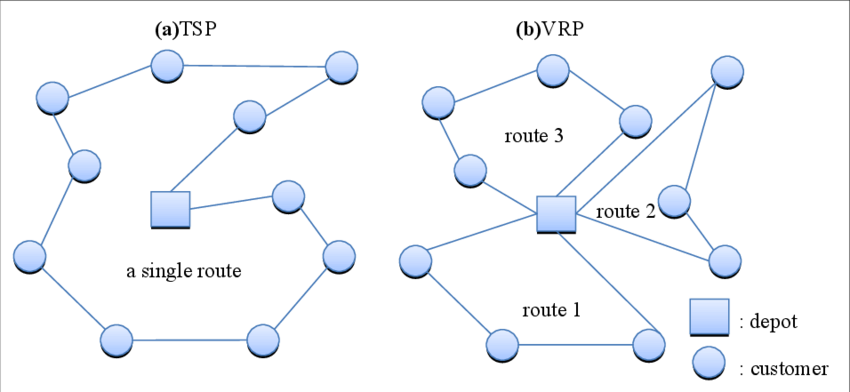

# <center> Modelisation of the problem

## Representation of the problem in a formal way
<br>

### Decision Problem
**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u \in V$
- N° of trucks $k \in \mathbb {N}$
- Demand $d_{\scriptscriptstyle i}$ for each vertex $v_{\scriptscriptstyle i}$
- Threshold $q \in \mathbb {R} $
  
**Problem** : $(P1)$ Is there  a set of cycles $S$ in $G$, one for each of the $k$ trucks, all starting from $u$, where each vertex in V is traversed by exactly one cycle in $S$, with $l$ being the total length of the longest path in $S$, and the sum of the demands of vertices traversed by any given cycle in $S$ doesn't exceed a trucks capacity, such that $l \leq q$ ?

<br>

### Optimisation problem

**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u \in V$
- N° of trucks $k \in \mathbb{N} $
- Demand $d_{\scriptscriptstyle i}$ for each vertex $v_{\scriptscriptstyle i}$

**Problem** : What is the smallest $q$ where $(P1)$ is true?

While our objective is to minimise the total cost of the most costly path in $S$, minimising the sum of the total costs of the different paths in $S$ is equivalent and easier to deal with mathematically. This is why we will focus mostly on the latter in the code and the mathematical models.

## Choosing data structures

### For instances of our problem

To represent instances of our particular problem, can already define:
- The starting point $v_{\scriptscriptstyle s}$ can be represented as the bare integer $s$.
- The number of trucks is just an integer
<br>

As seen before, our problem involves a complete graph. Adjacency lists are more optimised in terms of memory for sparse graphs, while adjacency matrices are best for denser graphs. This means that the most optimal of these two for representing our vertices and edges is an adjacency matrix.
<br>

One important data value still needs a data structure. This is the demands of the different vertices. It can simply be represented as an array of integers (a tuple of integers in python), where the integer at index $i$ represents the demand of vertex $v_{\scriptscriptstyle i}$.

*Comment: to be re-read*


### For the solution space

**1) Solutions**
<br>

A solution to our problem is a set of cycles $S$, exactly one for each truck. Any two of these cycles must have no vertices in common except for the starting point. All cycles must start and end at the same vertex.
<br>

It is important to note that we will need to represent such solutions with an integer linear programming model. It is also important to note that we will need to navigate quickly from one solution to its neighbours.
This is why we chose to represent our solutions in two different forms.
<br>

One of them is a 3-dimensional matrix of boolean values where $x_{\scriptscriptstyle ijk}$ is $1$ if truck $k$ goes from vertex $v_{\scriptscriptstyle i}$ to vertex $v_{\scriptscriptstyle j}$ and $0$ otherwise; and is used for integer linear programming.
<br>

The other one is a list of paths, one for each truck. Each path is represented by a list of integers designating the list of indices, in order, visited by a given truck. This form is used for metaheuristics.

**2) Neighourhood**

We defined two solutions as being neighbours it one can be obtained by moving one node around in the other's paths. By 'moving around', we mean moving a node, either somewhere else in the same path, or into another path from the same solution. If a solution's neighbour doesn't match the restriction of the truck capacity, then it itself isn't considered a solution of the feasible solution space, and is therefore not searched through.

A solution's neighbours can be easily found in the case of metaheuristics explained above by simply moving one value within the lists of the different trucks' paths.
<br><br>

Below is how we implemented the representation of an instance of the problem and the representation of a potential solution to the problem.

In [ ]:
import networkx as nx
def create_graph(adjacency):
    # Initialize a graph and add edges with distances as weights
    G = nx.complete_graph(len(adjacency))
    for i in range(len(adjacency)):
        for j in range(len(adjacency[i])):
            if i != j:
                G[i][j]['weight'] = adjacency[i][j]
    return G

In [ ]:
"""
Implementation of the representation of an instance of the problem
"""

import random as _random
from collections.abc import Iterable, Callable, Generator


def create_adjacency_matrix(size: int, cb: Callable[[int, int, object], int]) -> Iterable[Iterable[int]]:
    """
    Function that creates an adjacency matrix for a graph with 'size' vertices.
    Each cell at [i, j] in the matrix has its value set iteratively to the result of calling 'cb(i, j, adj)'.
    """
    adjacency = []

    for i in range(size):
        adjacency.append([])
        for j in range(size):
            value = cb(i, j, adjacency)
            adjacency[-1].append(value)

    return adjacency


def random_adjacency_matrix(size: int, max_cost: int, directed: bool = False) -> Iterable[Iterable[int]]:
    """
    Randomly generate an adjacency matrix for a complete graph of 'size' vertices,
    limiting the cost of edges to 'max_cost'.
    """
    def _callback(i, j, adj):
        """
        Called by 'create_adjacency_matrix' for each cell in the matrix.
        """
        # diagonal should be zeroes
        if j == i:
            return 0
        # matrix should be symmetrical if graph is undirected
        if (j < i) and (not directed):
            return adj[j][i]
        return _random.randint(1, max_cost)

    return create_adjacency_matrix(size, _callback)


def str_adjacency_matrix(matrix: Iterable[Iterable[int]]) -> str:
    max_lengths = [0 for _ in range(len(matrix[0]))]
    for j in range(len(matrix)):
        row = matrix[j]
        for i in range(len(row)):
            length = len(str(row[i]))
            if length > max_lengths[i]:
                max_lengths[i] = length

    return '\n'.join(('  '.join(str(row[i]).rjust(max_lengths[i]) for i in range(len(row)))) for row in matrix)


newline = '\n'

_random.seed(4)

class Problem:
    def __init__(self, adjacency: Iterable[Iterable[int]], start: int, truck_count: int, truck_capacity: int, demands: Iterable[int]):
        """
        Constructor.
        Our problem is represented as follows:
        - 'adjacency' is the adjacency matrix for our graph as a mutable list of lists. It contains the weights of the different edges
        - 'start' is the index of the starting point
        - 'truck_count' is the number of trucks available
        - 'truck_capacity' is the capacity of a truck
        - 'demands' stores the weight of each vertex in the graph in the form of an immutable list
        """
        self.adjacency = adjacency
        self.start = start
        self.truck_count = truck_count
        self.truck_capacity = truck_capacity
        self.demands = demands
        self.graph = create_graph(adjacency)

        # cache the feasibility of solutions:
        self.feasibilities = {}

    @classmethod
    def random(cls, vertex_count: int, max_cost: int, max_demand: int, max_truck_count: int, max_truck_capacity: int) -> 'Problem':
        """
        Randomly generates an instance of the problem, given a maximum for the relevant properties.
        weights, demands and number of trucks have a minimum of 1,
        start has a minimum of 0
        """
        # if the number of trucks exceeds the number of vertices, the problem becomes unsolvable because all trucks must be used
        if max_truck_count > vertex_count:
            max_truck_count = vertex_count

        # generate the adjacency list
        adjacency = random_adjacency_matrix(vertex_count, max_cost)

        # starting point
        start = _random.randint(0, vertex_count - 1)

        # number of trucks, 0 trucks doesn't make sense
        truck_count = _random.randint(1, max_truck_count)

        # demands for each vertex, a demand of 0 would be the same as the vertex not being in the graph
        # the starting point must have a demand of 0
        demands = tuple((_random.randint(1, max_demand) if i != start else 0) for i in range(vertex_count))

        # if the truck capacity is smaller than the most demanding vertex, the
        # problem is never solvable so we exclude this case
        min_truck_capacity = max(demands)
        truck_capacity = _random.randint(min_truck_capacity, max_truck_capacity)

        # returning the actual instance of our problem
        return cls(adjacency, start, truck_count, truck_capacity, demands)

    def might_have_feasible_solutions(self) -> bool:
        """
        Whether the problem can have a non-empty feasible solution space.
        If False is returned, it is certain that the problem has an empty
        feasible solution space.
        If True is returned, the problem's feasible solution space might or
        might not be empty.
        """
        if self.truck_count > len(self.adjacency):
            return False
        # PLACE OTHER GLOBAL FEASIBILITY CONDITIONS HERE
        return True

    def __str__(self):
        """
        Defines how an instance of the problem should be represented as a string.
        """
        str_adj = str_adjacency_matrix(self.adjacency)
        return (f"Instance of our problem: \nstart={self.start}, truck_count={self.truck_count}, truck_capacity={self.truck_capacity}\n"
                + f"demands: \n{', '.join(str(i) for i in self.demands)}\nadjacency: \n{str_adj}"
                )


# generate a random instance of our problem:
instance = Problem.random(30, 100, 10, 18, 50)
print(instance)


Instance of our problem: 
start=5, truck_count=6, truck_capacity=47
demands: 
10, 8, 10, 2, 2, 0, 3, 8, 4, 10, 5, 7, 10, 4, 8, 4, 5, 6, 4, 6, 9, 9, 8, 7, 9, 7, 6, 5, 8, 7
adjacency: 
  0  31  39  14   93  51   62  20  12   9   3  52   71   38  98    8  29   67  69   47  36  100  23   14  34  28   4  83   34  35
 31   0  25  22   40  38   81  94  48  12  78  44   86   50  65   32  23   32  61   36  12   71  39    1  38  74  91  40   98  66
 39  25   0  25   53  55   77  37  56  58  21  30   40   34   6   11   6   60  81   36  67   69  83   61  90  44  19  87   26   9
 14  22  25   0   53  26   82  81  57  36  24  46   56   96  76   42  82   72  26   42  13    8  91   30  36  98  75  79   31  16
 93  40  53  53    0  43   23  38  59   4   6  46   90   11  37   95  87   42   3   42  37   42  20  100  84  53  80  88   10  38
 51  38  55  26   43   0   80  25  57  38  18  33   49   77  21   43  74    2  47    6  59   22  47   47  38  74  13  57   27  55
 62  81  77  82   23  80    0  27  15

In [ ]:
"""
Implementation of the representation of potential solutions to our problem
"""

class Solution:
    def __init__(self, problem: Problem, paths: Iterable[Iterable[int]]):
        self.problem = problem  # the instance of the problem of which the current object is a solution
        # make sure our paths are tuples so they are hashable. This is required for caching.
        self.paths = tuple(tuple(p) for p in paths)

    def as_bool_matrices(self) -> Iterable[Iterable[Iterable[int]]]:
        result = []

        for truck_id in range(self.problem.truck_count):
            path = self.paths[truck_id]

            matrix = create_adjacency_matrix(len(self.problem.adjacency), lambda i,  j, adj: 0)

            for i in range(1, len(path)):
                matrix[path[i-1]][path[i]] = 1
            result.append(matrix)

        return result

    def get_max_total_cost(self) -> int:
        """
        Fitness function (thing we want to minimise): maximum total cost of our path
        """

        max_total_cost = 0

        for truck_id in range(len(self.paths)):
            truck_path = self.paths[truck_id]

            total_cost = sum(self.problem.adjacency[truck_path[i]][truck_path[i-1]] for i in range(len(truck_path)))

            if total_cost > max_total_cost:
                max_total_cost = total_cost

        return max_total_cost

    def _is_feasible(self) -> bool:
        """
        Non-cached feasibility check for solutions to the problem
        """
        # when we are sure there is no feasible solution, avoid performing the
        # rest of the checks for performance reasons
        if not self.problem.might_have_feasible_solutions():
            return False

        # there should be one path per truck
        if len(self.paths) != self.problem.truck_count:
            return False

        found_vertices = set()

        for path in self.paths:
            # all paths should start and end at the depot
            if not (path[0] == path[-1] == self.problem.start):
                return False

            # all paths should have a total cost of at most the capacity of a truck
            total_cost = sum(self.problem.adjacency[path[i]][path[i-1]] for i in range(1, len(path)))
            if total_cost > self.problem.truck_capacity:
                return False

            # no vertex should be visited more than once (except the depot)
            for vertex in path:
                if (vertex in found_vertices) and (vertex != self.problem.start):
                    return False
                found_vertices.add(vertex)

        # all vertices should be visited a least once
        if len(found_vertices) != len(self.problem.adjacency):
            return False

        return True

    def is_feasible(self) -> bool:
        """
        Wrapper around the feasibility check that caches its result.
        """
        # when we are sure there is no feasible solution, avoid performing the
        # rest of the checks for performance reasons
        if not self.problem.might_have_feasible_solutions():
            return False
        if self.paths not in self.problem.feasibilities:
            result = self._is_feasible()
            self.problem.feasibilities[self.paths] = self._is_feasible()
        return self.problem.feasibilities[self.paths]

    def _traverse(self) -> Generator[tuple[int, int], None, None]:  # n ** 2 generator
        """
        Generator that yields indices of each vertex in each truck path of the solution.
        Serves as a helper function for the swapping mechanism.
        """
        for truck_id in range(len(self.paths)):
            for vertex_pos in range(len(self.paths[truck_id])):
                yield (truck_id, vertex_pos)

    def _get_swap(self, truck_id_a, vertex_id_a, truck_id_b, vertex_id_b) -> 'Solution':  # n ** 2
        """
        Produces a copy of the paths, where vertices a and b are swapped.
        The user provides a truck id and a vertex id for both a and b.
        """
        result = [[] for i in range(len(self.paths))]

        for truck_id, vertex_pos in self._traverse():
            if (truck_id == truck_id_a) and (vertex_pos == vertex_id_a):
                result.append(self.paths[truck_id_b][vertex_id_b])
                continue
            if (truck_id == truck_id_b) and (vertex_pos == vertex_id_b):
                result.append(self.paths[truck_id_a][vertex_id_a])
                continue
            result.append(self.paths[truck_id][vertex_pos])

        return Solution(self.problem, result)

    def _find_all_swaps(self, source_truck_id, source_vertex_pos) -> 'Generator[Solution]':  # n ** 4
        """
        Generator that yields a copy of the paths for every possible swap of the provided vertex.
        """
        for truck_id, vertex_pos in self._traverse():
            if (truck_id == source_truck_id) and (vertex_pos == source_vertex_pos):
                continue

            yield self._get_swap(source_truck_id, source_vertex_pos, truck_id, vertex_pos)

    def list_neighbours(self) -> 'Generator[Solution]':  # n ** 6
        """
        GOD this can be swapped in so many different ways!!!
        Yields all the feasible neighbours of the current solution.
        This is done by going through all possible swap combinations of the
        current solution's paths and picking only the ones that are feasible.
        """
        for truck_id, vertex_pos in self._traverse():
            for swap in self._find_all_swaps(truck_id, vertex_pos):
                if swap.is_feasible():
                    yield swap
        return ()

    def __eq__(self, other):
        if not isinstance(other, Solution):
            return False
        if self.problem != other.problem:
            return False
        return self.paths == other.paths

    def __str__(self):
        """
        Defines how an solution to the problem should be represented as a string.
        """
        nl = '\n'
        str_paths = []
        for i in range(len(self.paths)):
            path = self.paths[i]
            str_paths.append(f"Truck {i}: " + '=>'.join(str(node) for node in path))
        return f"Solution a routing problem:\n {nl.join(str_paths)}"



In [ ]:

#representation of instance as graph
#it should take the adjacency matrix and the demands to plot the vertices with their weights
#and the edges with each weight

import networkx as nx
import matplotlib.pyplot as plt

def plot_instance(instance):
  adjacency = instance.adjacency
  start = instance.start
  truck_count = instance.truck_count
  truck_capacity = instance.truck_capacity
  demands = instance.demands
  vertex_count = len(adjacency)

  #plotting the graph
  G = nx.Graph()

  #vertices
  for i in range(vertex_count):
    G.add_node(i, demand=demands[i])

  #add edges
  for i in range(vertex_count):
    for j in range(i+1, vertex_count):
      if adjacency[i][j] != 0:
        G.add_edge(i, j, weight=adjacency[i][j])

  #draw graph
  pos = nx.spring_layout(G)

  #draw nodes with specific colors
  node_colors = ["lightblue" if i!= start else "orange" for i in range(vertex_count)]
  nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

  #draw edges
  nx.draw_networkx_edges(G, pos, width=1)
  edge_labels = {(i,j): adjacency[i][j] for i in range(vertex_count) for j in range(i+1, vertex_count)if adjacency[i][j]>0}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size = 8)

  #labels for demands
  demand_label = {i:f"{demands[i]}" for i in range(vertex_count)}
  nx.draw_networkx_labels(G, pos, labels=demand_label, font_color="red", font_size=8)

  plt.title(f"Graph rep of problem instance start:{start}, trucks:{truck_count}, truck_capacity:{truck_capacity}")
  plt.show()



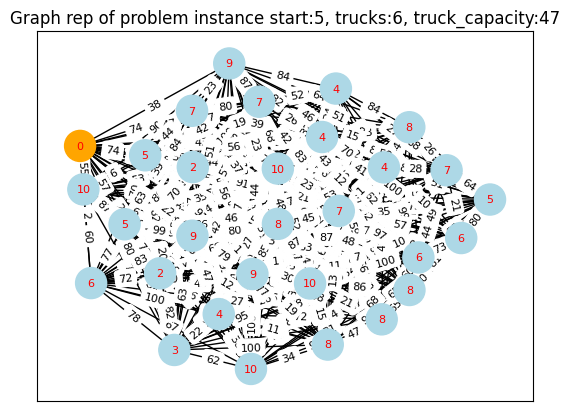

In [ ]:
plot_instance(instance)


</br>

## Identification of variables

<!--### Fixed variables

- Time slot ($t$)
Time slots are not included in our mathematical model

### Unfixed variables
-->

- Cost of edge between $v{\scriptscriptstyle i}$ and $v{\scriptscriptstyle j}$: ($c{\scriptscriptstyle ij}$)
- Truck capacity ($R$)
- Starting point $v{\scriptscriptstyle s}$
- Demand $d{\scriptscriptstyle i}$ for vertex $v{\scriptscriptstyle i}$
- Number of available trucks $K$

<br>

<!--## Identification Vertices vs Edges

Below is a table showing what constraints affect either the vertices or the edges :

| Vertices | Edges |
|----------|----------|
| Traffic | Time slot |
| Total cost |Types of items |
<br>
-->

## Complexity analysis

### Travelling Salesman Problem

The TSP is formally defined as follows:

Given a complete weighted graph $ G = (V, E) $ with vertices $ V = \{v_1, v_2, ..., v_n\} $ and edges \( $E$ \) with weights $( w: E \rightarrow \mathbb{R}^+ )$, find a Hamiltonian cycle (a cycle that visits each vertex exactly once) with the minimum total cost.

TSP is known to be NP-Hard. This means that if we could solve TSP in polynomial time, we could solve any problem in NP in polynomial time [9].

### Reduction of TSP to our problem
<!--TODO: change reduction target from being VRP to being our problem. Our problem is not exactly VRP-->
To show that our problem is at least as hard as TSP, we perform a reduction from TSP to our problem.

1. **Instance of TSP**:
   - Let $G = (V, E)$ be a complete weighted undirected graph with $n$ vertices.
   - The cost of moving between vertices $v_i$ and $v_j$ is given by $c_{ij}$.

2. **Reduction to an instance of our problem**:
   <!--- Create an instance of our problem with the same set of vertices $V$ and edges $E$.
   - Set the depot $(v_1)$ as the starting and ending point.
   - Assume there is only one vehicle with sufficient capacity to visit all vertices.
   - The objective is to find the shortest route that visits all vertices and returns to the depot.-->
   - Keep the same vertices $V$ and edges $E$
   - Assign 1 truck in order to do the delivery job
   - Set the capacity of that truck to the number of vertices in the graph minus 1
   - Give all vertices a demand/weight of 1, except for the depot, for which that value is 0.

Formally, the instance of our problem that represents the TSP instance is:
- **Vertices**: same $V$ as the TSP instance
- **Edges**: same $E$ as the TSP instance
- **Depot**: same depot as the TSP instance
- **Vehicle Capacity**: equal to the number of vertices in the graph minus 1
- **Weights of vertices**: $0$ for the depot, $1$ for all the others

<!--The reduction is straightforward:
- The TSP instance is directly transformed into a VRP instance with one vehicle.
- The optimal solution to the VRP instance (with one vehicle) is the same as the optimal solution to the TSP instance.-->
Now, it is trivial that the single path of the best solution to the instance of our problem is also the best solution to the instance of TSP.

### Example

Consider a simple example to illustrate the reduction:

1. **TSP Instance**:
   - Vertices: $ V = \{v_0, v_1, v_2, v_3\} $
   - Starting point $v_0$
   - Distance matrix $( D )$:
     \
     D = \begin{pmatrix}
     0 & 10 & 15 & 20 \\
     10 & 0 & 35 & 25 \\
     15 & 35 & 0 & 30 \\
     20 & 25 & 30 & 0
     \end{pmatrix}
     

2. **Reduction to an instance of our problem**:
   - Vertices/Edges: Same as the ones from the TSP instance
   - Depot: The starting point of the TSP instance, which is $v_0$
   - Vehicle Capacity: 4 - 1 = 3, since our graph has 4 vertices
   - Weights of vertices: $0$ for the depot, $1$ for $v_1$, $v_2$ and $v_3$


The VRP instance is essentially the same as the TSP instance, with the depot $( v_1 $) and one vehicle that must visit all vertices and return to the depot.

#### Optimal Solution

For the given distance matrix, the optimal TSP solution (and thus the optimal VRP solution with one vehicle) might be:
- Route: $( v_0 \rightarrow v_1 \rightarrow v_2 \rightarrow v_3 \rightarrow v_0 $)
- Total Distance: $( 10 + 35 + 30 + 20 = 95 $)

This example shows that solving the instance of our problem with one vehicle is equivalent to solving the TSP instance.

In conclusion, since TSP is NP-Hard and we have shown that TSP can be reduced to an instance of our problem, it follows that our problem is also NP-Hard. This means that there is no known polynomial-time algorithm to solve it.

The code below performs the polynomial reduction of an instance of TSP to an instance of our problem.


In [ ]:


class TSPInstance:
    def __init__(self, adjacency: Iterable[Iterable[int]], start: int):
        self.adjacency = adjacency
        self.start = start

    def as_our_problem(self) -> Problem:
        return Problem(self.adjacency, self.start, 1, len(self.adjacency), ((1 if i != self.start else 0) for i in range(len(self.adjacency))))

    @classmethod
    def random(cls, vertex_count, max_cost) -> 'TSPInstance':
        return cls(random_adjacency_matrix(vertex_count, max_cost), _random.randint(0, vertex_count - 1))

    def __str__(self):
        return f"TSP problem, start={self.start}, adjacency:\n{str_adjacency_matrix(self.adjacency)}"



# generate a random TSP instance
tsp_instance = TSPInstance.random(5, 10)

print(tsp_instance)

# reduce that instance to an instance of our problem
our_problem = tsp_instance.as_our_problem()

print(our_problem)



In [ ]:
!pip install tqdm
!pip install pulp


from tqdm import tqdm
import pulp
import numpy as np

def solve_vrp_with_milp(problem: Problem) -> 'Solution':
    """
    Solves the Vehicle Routing Problem using Mixed-Integer Linear Programming (MILP).

    Parameters:
        problem (Problem): The instance of the problem containing the problem parameters (start, truck_count, truck_capacity, adjacency, and demands).

    Returns:
        Solution: A feasible Solution instance if found, else None.
    """
    n = len(problem.adjacency)
    depot = problem.start
    truck_count = problem.truck_count
    truck_capacity = problem.truck_capacity
    distance_matrix = np.array(problem.adjacency)
    demands = problem.demands

    total_iterations = 10  # This should be adjusted based on your specific solver steps

    # Define the MILP problem
    prob = pulp.LpProblem("VRP", pulp.LpMinimize)

    # Decision variables: x[i, j, k] = 1 if the route goes from i to j for truck k, 0 otherwise
    x = pulp.LpVariable.dicts("x", [(i, j, k) for i in range(n) for j in range(n) for k in range(truck_count)], 0,1, pulp.LpBinary)
    u = pulp.LpVariable.dicts("u", [(i, k) for i in range(n) for k in range(truck_count)], lowBound=0, upBound=truck_capacity, cat='Integer')

    # Objective: Minimize total distance
    prob += pulp.lpSum(distance_matrix[i][j] * x[(i, j, k)] for i in range(n) for j in range(n) for k in range(truck_count) if i != j)

    # Constraints
    # Each node must be visited exactly once by one truck
    for i in range(n):
        prob += pulp.lpSum(x[(i, j, k)] for j in range(n) for k in range(truck_count) if j != i) == 1, f"Visit from {i}"
        prob += pulp.lpSum(x[(j, i, k)] for j in range(n) for k in range(truck_count) if j != i) == 1, f"Visit to {i}"

    # Subtour elimination constraints (to avoid cycles in the paths)
    for k in range(truck_count):
        for i in range(n):
          prob += (pulp.lpSum(x[i,j,k] for j in range(n) if j != i) ==
                   pulp.lpSum(x[j,i,k] for j in range(n) if j != i))

    # Ensure the trucks start and end at the depot
    for k in range(truck_count):
        prob += pulp.lpSum(x[(depot, j, k)] for j in range(n) if j != depot) == 1, f"Start Truck {k} at depot"
        prob += pulp.lpSum(x[(i, depot, k)] for i in range(n) if i != depot) == 1, f"End Truck {k} at depot"

    # Ensure that truck capacity is respected (sum of demands visited by each truck)
    for k in range(truck_count):
        prob += pulp.lpSum(demands[i] * pulp.lpSum(x[(i, j, k)] for j in range(n) if j != i) for i in range(1, n)) <= truck_capacity, f"Capacity_Truck_{k}"

    # Initialize the progress bar
    with tqdm(total=total_iterations, desc="Solving VRP", unit="iteration") as pbar:
        for iteration in range(total_iterations):
            prob.solve(pulp.PULP_CBC_CMD())  # Explicit solver call
            pbar.update(1)  # Update progress bar after each iteration

        # Check solver status and print debugging messages
        if pulp.LpStatus[prob.status] != 'Optimal':
            print(f"Iteration {iteration+1}: Solver status - {pulp.LpStatus[prob.status]}")
            if pulp.LpStatus[prob.status] == 'Infeasible':
                print("The problem is infeasible!")
            return None

        # Extract the solution paths (based on the x variables)
        paths = []
        for k in range(truck_count):
            current_node = depot
            path = [depot]  # Start at the depot
            visited = set([depot])

            while True:
                found_next = False
                # Check all possible destinations from the current node for this truck
                for j in range(n):
                    # Ensure we're not going to the same node and there is a valid route to the next node
                    if current_node != j and pulp.value(x[(current_node, j, k)]) == 1:
                        path.append(j)
                        visited.add(j)
                        current_node = j
                        found_next = True
                        break  # Move to the next node for this truck

                # Stop if we either reach the depot again or find no new location to visit
                if not found_next or current_node == depot:
                    break

            paths.append(path)  # Append the completed path for this truck

        # Create and return the Solution instance
        solution = Solution(problem, paths)
        print(f"Solution: {solution}")
        upper_bound = pulp.value(prob.objective)
        print(f"Upper bound: {upper_bound}")
        return solution

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 71.6 MB/s eta 0:00:00


In [ ]:
solution = solve_vrp_with_milp(instance)

Solving VRP: 100%|██████████| 10/10 [00:06<00:00,  1.67iteration/s]

Iteration 10: Solver status - Infeasible
The problem is infeasible!


In [ ]:
#multistart
from tqdm import tqdm

def solve_vrp_multistart(problem: Problem, total_starts: int = 10) -> 'Solution':
    """
    Solves the Vehicle Routing Problem using a Multistart MILP approach.

    Parameters:
        problem (Problem): The instance of the problem containing the problem parameters (start, truck_count, truck_capacity, adjacency, and demands).
        total_starts (int): Number of times to run the MILP solver with different initial configurations.

    Returns:
        Solution: A feasible Solution instance with the best path found across all starts.
    """
    best_solution = None
    best_upper_bound = float('inf')  # Start with a very high upper bound

    # Multistart: Run the solver multiple times
    with tqdm(total=total_starts, desc="Running Multistart MILP", unit="start") as pbar:
        for start in range(total_starts):
            pbar.update(1)

            # Call the MILP solver for this start
            current_solution = solve_vrp_with_milp(problem)

            if current_solution:
                current_upper_bound = pulp.value(current_solution.objective)  # Assuming we can extract the total distance

                # Update the best solution found
                if current_upper_bound < best_upper_bound:
                    best_solution = current_solution
                    best_upper_bound = current_upper_bound

        if best_solution is None:
            print("No feasible solution found across all starts!")
            return None

        print(f"Best solution found with total distance (upper bound): {best_upper_bound}")
        return best_solution


In [ ]:
better_solution = solve_vrp_multistart(instance)

## Certificate algorithm


In [1]:
def verif(solution_paths, trucks, G, C, q):
    """
    Verifies if a given set of truck routes (solution) is valid.

    Parameters:
    - solution_paths: A dictionary where each key represents a truck ID, and each value is a list of vertices
      representing the truck's path (each path must form a loop).
    - trucks: A list of trucks.
    - G: A graph represented as an adjacency matrix (2D list) for a weighted, undirected, connected, complete, multi-edge graph.
    - C: The truck capacity constraint.
    - q: The maximum allowable path length (threshold) for each truck.

    Returns:
    - True if the solution satisfies all constraints, False otherwise.
    """
    visited = set()

    # Ensure each route starts and ends at the starting node
    for path in solution_paths.values():
        if path[0] != path[-1]:
            return False
        for vertex in path[1:-1]:
            if vertex in visited:
                return False
            visited.add(vertex)

    # Calculate total demand for the truck's route and ensure it does not exceed capacity
    for path in solution_paths.items():
        for node in path:
          total_demand = sum(G.get(node, 0))
          if node != 0 or total_demand > C:
            return False

        # Calculate total path length for the truck's route and ensure it does not exceed threshold
        for i in range(len(path) - 1):
          total_length = sum(G[path[i]][path[i + 1]])
          if total_length > q:
            return False

    return True


## Linear programming mathematical model

<strong> Decision variables </strong>:
  
  - $V$ is the set of vertices
  - $K$ is number of available trucks
  - $T$ is the set of trucks {$0,1,..., K-1$}
  - $c {\scriptscriptstyle ij} $ is the cost of edge connecting vertices $i$ and $j$
  - $R$ is the capacity of a truck
  - $d {\scriptscriptstyle i} $ is the demand of vertex $v{\scriptscriptstyle i}$
  - $x {\scriptscriptstyle ijk} = \begin{cases} \text{1 if truck $k$ travels from $i$ to $j$} \\ \text{0 otherwise} \end{cases} $


<strong> Constraints: </strong>
  * let $W$ be $V \setminus \{0\}$
  


  * The sum of the demands at the vertices traversed by a truck shouldn't exceed the capacity of a truck
  $$R \geq \sum_{i \in V} \sum_{j \in V} d_{\scriptscriptstyle i} x_{\scriptscriptstyle ijk} \quad \forall k \in T$$

  * Each vertex must be left by exactly one truck, except for the depot.
  $$ \sum_{k \in T} \sum_{j \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall i \in W $$

  * Each vertex must be entered by exactly one truck, except for the depot.
  $$\sum_{k \in T} \sum_{i \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall j \in W$$

  * Each truck must enter the depot exactly once. Implies that all trucks must be used.
  $$\sum_{i \in V} x_{\scriptscriptstyle i0k} = 1 \quad \forall k \in T$$

  * Each truck must leave the depot exactly once. Implies that all trucks must be used.
  $$ \sum_{j \in V} x_{\scriptscriptstyle 0jk} = 1 \quad \forall k \in T$$

  * $x_{\scriptscriptstyle ijk}$ must be a 3-dimensional matrix of boolean values.
  $$ x_{\scriptscriptstyle ijk} \in \left\{0;1\right\} \quad \forall (i,j) \in V^2; \forall k \in T $$
    
<strong> Objective: </strong>

  minimize $f(V, K, T, c {\scriptscriptstyle ij}, R, d {\scriptscriptstyle i}, x {\scriptscriptstyle ijk}) = \sum_{k=0}^{K-1} \sum_{i \in V} \sum_{j \in V} c {\scriptscriptstyle ij}.x {\scriptscriptstyle ijk}$


## Choice of Metaheuristic

We chose to use the simulated annealing algorithm in order to approximate the solution to our problem as, given that one solution can have so many neighbours, this algorithm has enough diversifiability to not take too long to converge, while having enough intensifiability to converge with a suffcient precision.  

## Conclusion

To conlude the modelling phase, we have been able to identify and determine the project problem and its context. This helped us in the modelisation which lead us to the conclusion that our problem is a Vehicle Routing Problem (VRP).

It is an extension of a normal TSP problem as it focuses on routes, however, VRP also includes multiple vehicles and a central depot as a starting point for each of them.<br>

Moreover, we have been able to figure the computational complexity of our VRP problem as NP-Hard. Lastly, we have come up with our decision variables, various constraints and their mathematical representations subject to our objective function to minimize the cost of the longest route found.

# <center> Bibliographic references

- [1] Tadeusz Ostrowski, Petroula M. Mavrikiou. (2015). A Heuristic Algorithm for Optimal Hamiltonian Cycles in Weighted Graphs. Advances in mathematics.

- [2] Seth Gilbert. (2015). The Asymmetric Traveling Salesman. Optimization Algorithms.

- [3] Vivek Bagaria, Jian Ding, David Tse, Yihong Wu, Jiaming Xu. (2018). Hidden Hamiltonian Cycle Recovery via Linear Programming

- [4] Chunyu Ren. (09/11/2011). Solving Min-Max Vehicle Routing Problem. Journal of software, Vol6.

- [5] Google operations research tools on TSP. https://developers.google.com/optimization/routing/tsp

- [6] TSP. Hexaly. Route optimisation software and API. https://www.hexaly.com/docs/last/exampletour/tsp.html

- [7] Said Elatar, Karim Abouelmehdi, & Riffi, M. E. (2023). The vehicle routing problem in the last decade: variants, taxonomy and metaheuristics. Procedia Computer Science, 220, 398–404. https://doi.org/10.1016/j.procs.2023.03.051

- [8] Louati, A., Rahma Lahyani, Abdulaziz Aldaej, Racem Mellouli, & Muneer Nusir. (2021). Mixed Integer Linear Programming Models to Solve a Real-Life Vehicle Routing Problem with Pickup and Delivery. Applied Sciences, 11(20), 9551–9551. https://doi.org/10.3390/app11209551

- [9] Vladimir Deineko, Alexander Tiskin. (2014). One-sided monge TSP in NP-Hard. NP vs P problems.
